# Data Exploration and Manipilation

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats 
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 

In [2]:
# Import cab data datsett
cab_filename = 'Cab_Data.csv'
cab_data = pd.read_csv(cab_filename)
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
# Convert cab_data['Date of Travel']  dates to YYYY/MM/DD format
def date_conv(x):
    delta = datetime.timedelta(x)
    start_date = datetime.date(1900,1,1)
    return start_date + delta

In [6]:
cab_data['Date of Travel']= cab_data['Date of Travel'].apply(date_conv)

In [7]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [8]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [9]:
# Convert cab_data['Date of Travel'] to datetime
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])

In [10]:
cab_data['Date of Travel'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 359392 entries, 0 to 359391
Series name: Date of Travel
Non-Null Count   Dtype         
--------------   -----         
359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB


In [11]:
# Create a column for profit
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [12]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [13]:
# Create columns for year, moth and day from date of travel
cab_data['year'] = pd.DatetimeIndex(cab_data['Date of Travel']).year
cab_data['month'] = cab_data['Date of Travel'].dt.strftime('%b')
cab_data['day'] = pd.DatetimeIndex(cab_data['Date of Travel']).day
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,day
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,Jan,10
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,Jan,8
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,2016,Jan,4
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,2016,Jan,9
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,2016,Jan,5
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,2018,Jan,10
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,2018,Jan,6
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,2018,Jan,7
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,2018,Jan,7


In [14]:
# Import the other datasets
city_filename = 'City.csv'
city_data = pd.read_csv(city_filename)
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [15]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [16]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
# Convert city_data['Population'] and city_data['Users'] to integers
city_data['Population'] = city_data['Population'].replace(',','',regex=True)
city_data['Users'] = city_data['Users'].replace(',','',regex=True)

In [18]:
city_data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [19]:
city_data['Population'] = city_data['Population'].astype(int)

In [20]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     object
dtypes: int32(1), object(2)
memory usage: 528.0+ bytes


In [21]:
city_data['Users'] = city_data['Users'].astype(int)

In [22]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [23]:
customer_filename = 'Customer_ID.csv'
customer_data = pd.read_csv(customer_filename)
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [24]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [25]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:
transaction_filename = 'Transaction_ID.csv'
transaction_data = pd.read_csv(transaction_filename)
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [27]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [28]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [29]:
# Merge customer and transaction datasets
customer_transactions = transaction_data.merge(customer_data, on = 'Customer ID')
customer_transactions

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [30]:
# merge customer_transactions with cab_data
full_data = cab_data.merge(customer_transactions, on = 'Transaction ID')

In [31]:
full_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,day,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,Jan,10,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,Jan,8,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,2016,Jan,4,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,2016,Jan,9,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,2016,Jan,5,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,2018,Jan,10,52392,Cash,Male,24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,2018,Jan,6,53286,Cash,Male,32,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,2018,Jan,7,52265,Cash,Male,56,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,2018,Jan,7,52175,Card,Male,32,6423


In [32]:
# Create new column specifying the different states
city_state = cab_data['City']
state = city_state.str.split().str[-1]
state

0         GA
1         GA
2         GA
3         GA
4         GA
          ..
359387    DC
359388    DC
359389    DC
359390    DC
359391    DC
Name: City, Length: 359392, dtype: object

In [33]:
state = state.replace('VALLEY','CA').replace('COUNTY','CA')
state

0         GA
1         GA
2         GA
3         GA
4         GA
          ..
359387    DC
359388    DC
359389    DC
359390    DC
359391    DC
Name: City, Length: 359392, dtype: object

In [34]:
full_data['State'] = state
full_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,day,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,Jan,10,29290,Card,Male,28,10813,GA
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,Jan,8,27703,Card,Male,27,9237,GA
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,2016,Jan,4,28712,Cash,Male,53,11242,GA
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,2016,Jan,9,28020,Cash,Male,23,23327,GA
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,2016,Jan,5,27182,Card,Male,33,8536,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,2018,Jan,10,52392,Cash,Male,24,15651,DC
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,2018,Jan,6,53286,Cash,Male,32,6528,DC
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,2018,Jan,7,52265,Cash,Male,56,7966,DC
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,2018,Jan,7,52175,Card,Male,32,6423,DC


# Visualisations

### Customer Segmentation

Text(0.5, 1.0, 'Population vs Customers per City')

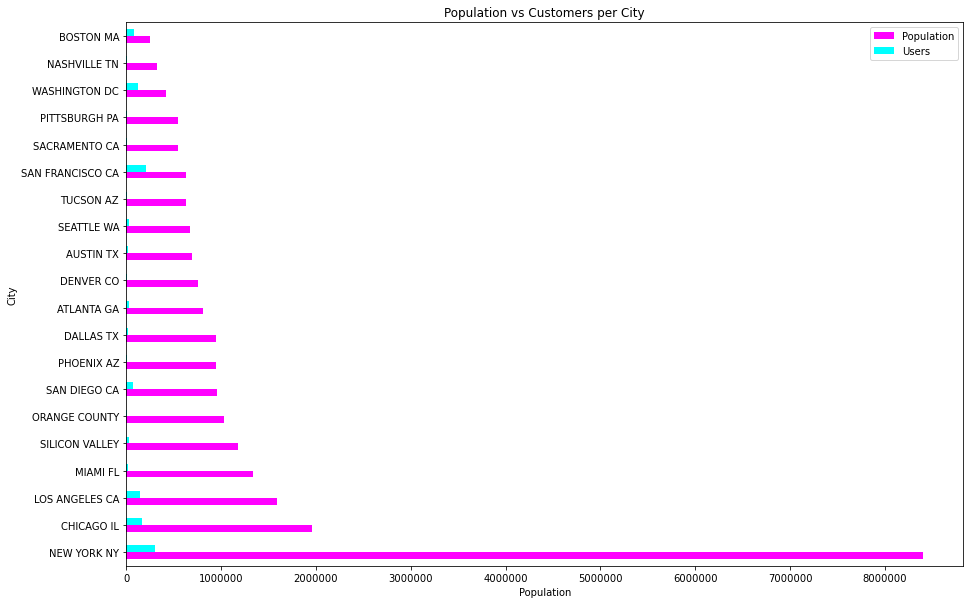

In [35]:
# Population vs Users per state
ax = city_data.plot(kind='barh',figsize = (15,10),color=['magenta','cyan'], x='City')
ax.ticklabel_format(axis='x', style='plain')
ax.set_xlabel('Population')
plt.title('Population vs Customers per City')

In [36]:
# genders = full_data.groupby(['Customer ID', 'Gender'])
# len(full_data['Customer ID'].unique())
genders = full_data.groupby(by='Customer ID')['Gender'].count().reset_index()
genders

,Customer ID,Gender
0,1,29
1,2,40
2,3,46
3,4,26
4,5,31
...,...,...
46143,59996,4
46144,59997,10
46145,59998,9
46146,59999,8


In [37]:
customer_income = full_data.groupby(by=['Customer ID'])['Income (USD/Month)'].unique().reset_index()

def arr_inte(x):
    my_int = int(x)
    return my_int

customer_income['Income (USD/Month)']= genders_income['Income (USD/Month)'].apply(arr_inte)
customer_income


NameError: name 'genders_income' is not defined

In [38]:
customer_gender_income = full_data.groupby(by=['Customer ID']).agg({'Gender': 'unique', 'Income (USD/Month)': 'unique'}).reset_index()

def arr_str(x):
    my_string = ' '.join(x)
    return my_string

customer_gender_income['Income (USD/Month)']= customer_gender_income['Income (USD/Month)'].apply(arr_inte)
customer_gender_income['Gender']= customer_gender_income['Gender'].apply(arr_str)
customer_gender_income


,Customer ID,Gender,Income (USD/Month)
0,1,Male,16359
1,2,Male,12069
2,3,Female,12968
3,4,Male,13803
4,5,Male,9965
...,...,...,...
46143,59996,Male,16634
46144,59997,Male,22352
46145,59998,Female,5678
46146,59999,Male,24577


Text(0.5, 0.98, 'Income Distribution among Customers')

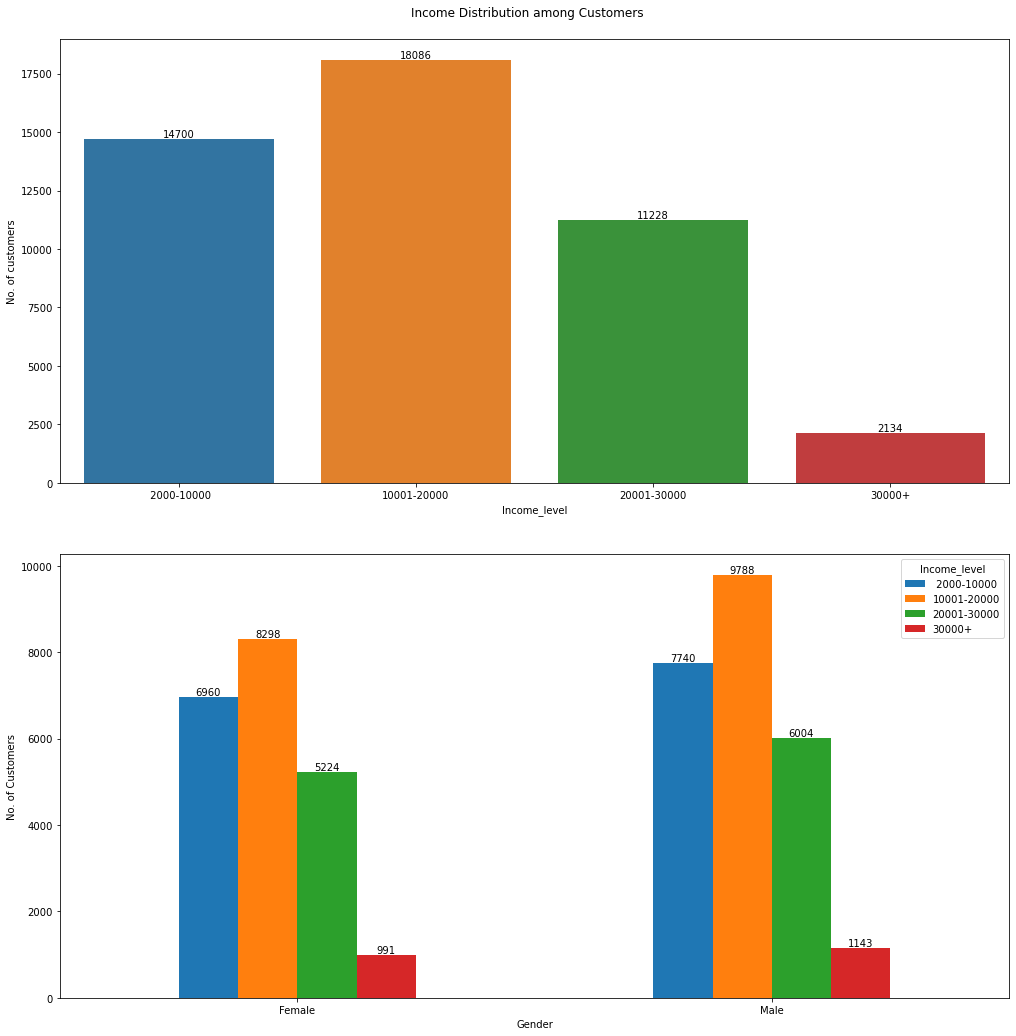

In [39]:
customer_income.loc[customer_income['Income (USD/Month)']>=2000,'Income_level'] = ' 2000-10000'
customer_income.loc[customer_income['Income (USD/Month)']>10000,'Income_level'] = '10001-20000'
customer_income.loc[customer_income['Income (USD/Month)']>20000,'Income_level'] = '20001-30000'
customer_income.loc[customer_income['Income (USD/Month)']>30000,'Income_level'] = '30000+'

customer_gender_income.loc[customer_gender_income['Income (USD/Month)']>=2000,'Income_level'] = ' 2000-10000'
customer_gender_income.loc[customer_gender_income['Income (USD/Month)']>10000,'Income_level'] = '10001-20000'
customer_gender_income.loc[customer_gender_income['Income (USD/Month)']>20000,'Income_level'] = '20001-30000'
customer_gender_income.loc[customer_gender_income['Income (USD/Month)']>30000,'Income_level'] = '30000+'
# type(customer_gender_income['Income (USD/Month)'][0])
# customer_gender_income['Income (USD/Month)'].describe()
income_groups_gender = customer_gender_income.groupby(by='Income_level')['Gender'].value_counts()
# income_groups_gender
income_groups_gender_1 = income_groups_gender.unstack(level=0)
# income_groups_gender_1

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
fig.tight_layout(pad=5)

# plt.figure(figsize = (10,8))
income_groups = customer_income.groupby(by='Income_level')['Customer ID'].count().reset_index()
ax1 = sns.barplot(data=income_groups, x= 'Income_level', y = 'Customer ID', ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container,label_type='edge', rotation=0, color='black')
# ax1.bar_label(ax.containers[0])
ax1.set_ylabel('No. of customers')

ax2 = income_groups_gender_1.plot(kind='bar',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='edge', rotation=0, color='black')#,fmt='%d')
ax2.set_ylabel('No. of Customers')
ax2.set_xticklabels(['Female','Male'],rotation=0)
plt.suptitle('Income Distribution among Customers')

In [41]:
customer_age = full_data.groupby(by=['Customer ID'])['Age'].unique().reset_index()
# customer_age
customer_age['Age']= customer_age['Age'].apply(arr_inte)
# customer_age
customer_gender_age = full_data.groupby(by=['Customer ID']).agg({'Gender': 'unique', 'Age': 'unique'}).reset_index()
# customer_gender_age
customer_gender_age['Age']= customer_gender_age['Age'].apply(arr_inte)
customer_gender_age['Gender']= customer_gender_age['Gender'].apply(arr_str)
# customer_gender_age

Text(0.5, 0.98, 'Distribution of users between Age Groups')

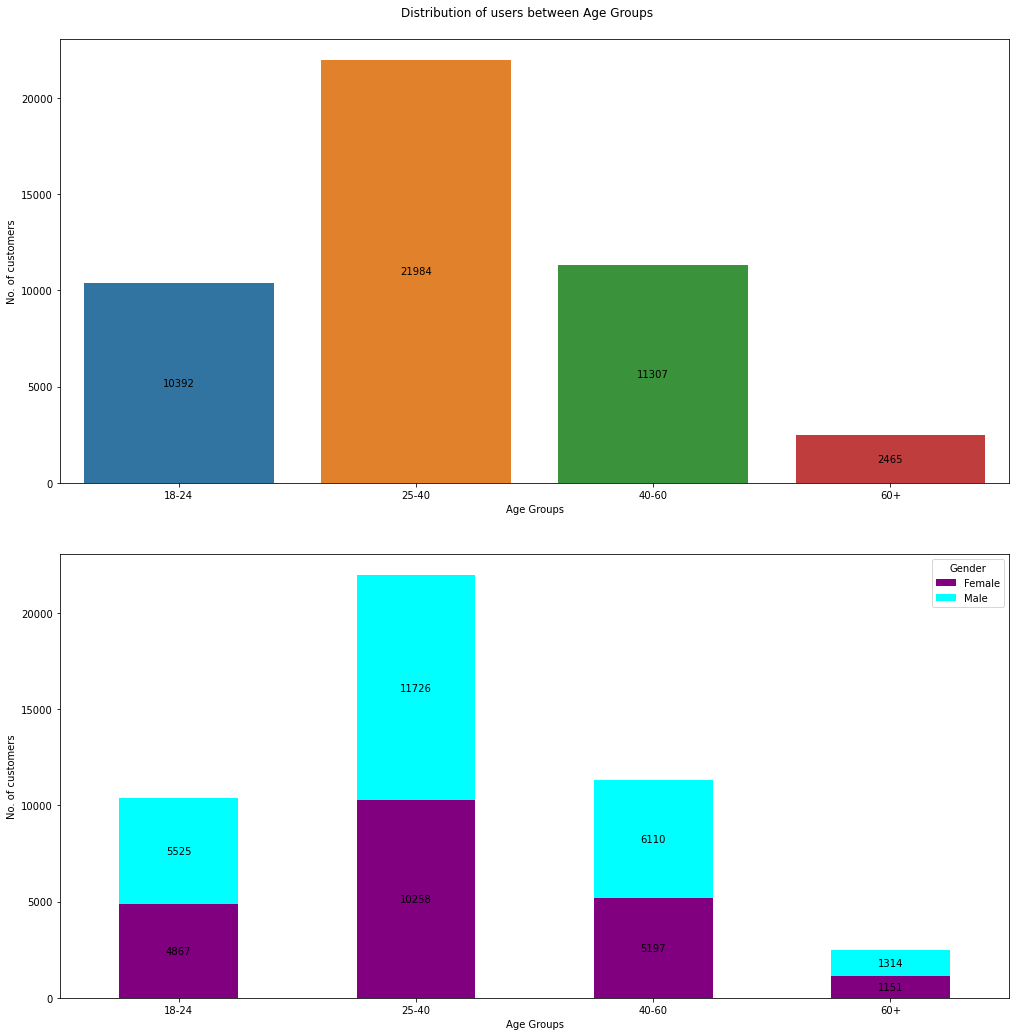

In [42]:
# Segment customers by age-groups
customer_age.loc[customer_age['Age']>=18,'Age_group'] = '18-24'
customer_age.loc[customer_age['Age']>24,'Age_group'] = '25-40'
customer_age.loc[customer_age['Age']>39,'Age_group'] = '40-60'
customer_age.loc[customer_age['Age']>60,'Age_group'] = '60+'

age_groups = customer_age.groupby(by='Age_group')['Age'].count()
age_groups

customer_gender_age.loc[customer_gender_age['Age']>=18,'Age_group'] = '18-24'
customer_gender_age.loc[customer_gender_age['Age']>24,'Age_group'] = '25-40'
customer_gender_age.loc[customer_gender_age['Age']>39,'Age_group'] = '40-60'
customer_gender_age.loc[customer_gender_age['Age']>60,'Age_group'] = '60+'

age_groups_gender = customer_gender_age.groupby(by='Age_group')['Gender'].value_counts()
age_groups_gender_1 = age_groups_gender.unstack(level=1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
fig.tight_layout(pad=5)
ax1 = sns.barplot(x = age_groups.index, y = age_groups.values, ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container,label_type='center', rotation=0, color='black')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('No. of customers')
# ax1.bar_label(ax.containers[1])

ax2 = age_groups_gender_1.plot(kind='bar', stacked=True, color=['purple','cyan'],ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='center', rotation=0, color='black')#,fmt='%d')
plt.xticks(rotation=0)
ax2.set_xlabel('Age Groups')
ax2.set_ylabel('No. of customers')
plt.suptitle('Distribution of users between Age Groups')

### Transactions

Text(0, 0.5, 'No. of Transactions')

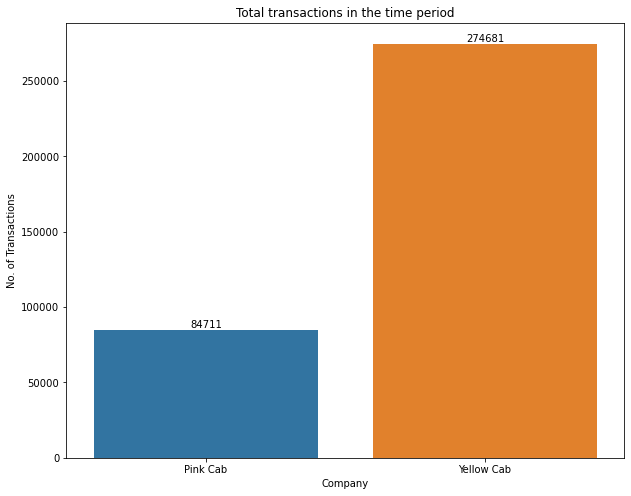

In [43]:
# Overall number of transactions per company
transactions_by_company = cab_data.groupby(by=['Company'])['Transaction ID'].count().reset_index()
transactions_by_company

plt.figure(figsize = (10,8))
ax = sns.barplot(data=transactions_by_company, x='Company', y='Transaction ID')
plt.title('Total transactions in the time period')
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Transactions')
# ax2.set_ylabel('No. of customers')

Text(0, 0.5, 'No. of Transactions')

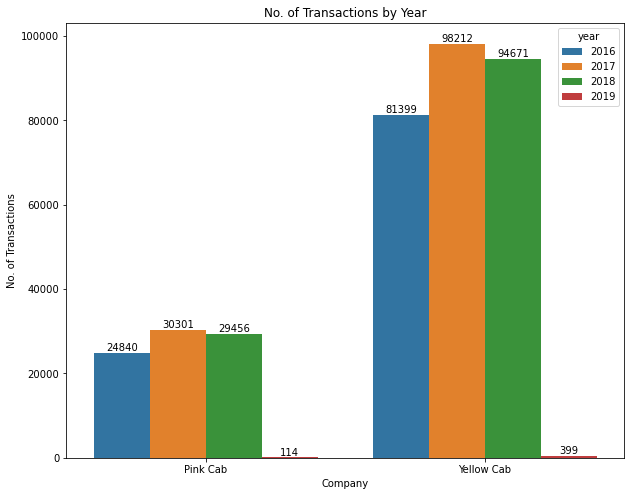

In [44]:
# Total number of transactions by each company per year
transactions_by_year = cab_data.groupby(by=['Company','year'])['Transaction ID'].count().reset_index()
# transactions_by_year

plt.figure(figsize = (10,8))
ax = sns.barplot(data=transactions_by_year, x='Company', y='Transaction ID', hue='year')#, aspect=2 )
plt.title('No. of Transactions by Year')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylabel('No. of Transactions')

Text(0.5, 0, 'No. of Transactions')

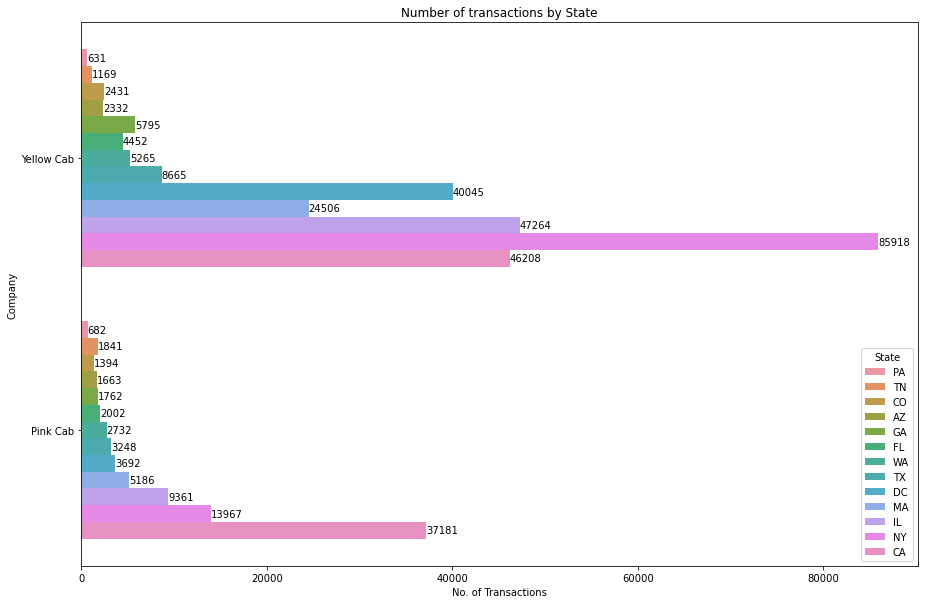

In [45]:
# Overall taransactions by company per year by state
transaction_by_state = full_data.groupby(by=['Company','State'])['Transaction ID'].count().sort_values().reset_index()
# profit_by_state
plt.figure(figsize = (15,10))
ax = sns.barplot(data=transaction_by_state, y='Company', x='Transaction ID', hue='State')#, height=0.8)#, aspect=2 )
ax.ticklabel_format(axis='x', style='plain')
# ax.bar_label(ax.containers[8], label_type='edge', rotation=0, color='black',fmt='%d')
for container in ax.containers:
    ax.bar_label(container,label_type='edge', rotation=0, color='black',fmt='%d')
plt.title('Number of transactions by State')
ax.set_xlabel('No. of Transactions')

Text(0.5, 1.0, '% of price charged amount paid per Payment Mode')

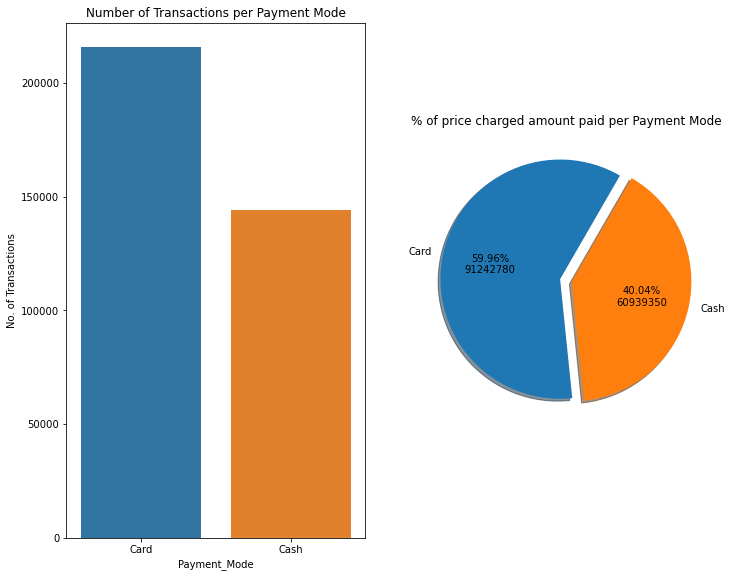

In [50]:
# Overall number of transactions using a given mode of payment
payment_mode = full_data.groupby(by=['Payment_Mode'])['Transaction ID'].count().reset_index()
payment_mode_amounts = full_data.groupby(by=['Payment_Mode'])['Price Charged'].sum().reset_index()
# payment_mode
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=2)
# Barplot for no. of transaction per payment mode
ax1 = sns.barplot(data=payment_mode, x='Payment_Mode', y='Transaction ID', ax=ax1)
ax1.bar_label(ax.containers[0])
ax1.set_ylabel('No. of Transactions')
ax1.set_title('Number of Transactions per Payment Mode')
# Pieplot for total price charged per payment mode
def abs_vals(pct, vals):
    absolute = int(np.round(pct/100.*np.sum(vals)))
    return f"{pct:.2f}%\n{absolute}"
ax2.pie(data=payment_mode_amounts,
           x='Price Charged',
           labels='Payment_Mode',
           autopct=lambda pct: abs_vals(pct, payment_mode_amounts['Price Charged']),
           shadow=True,
           explode=(0.05, 0.05),
           startangle=60)
ax2.set_title('% of price charged amount paid per Payment Mode')

# plt.suptitle('Payment Modes: Transactions vs Payment Made')

Text(0.5, 1.0, 'Customer transactions by gender per city')

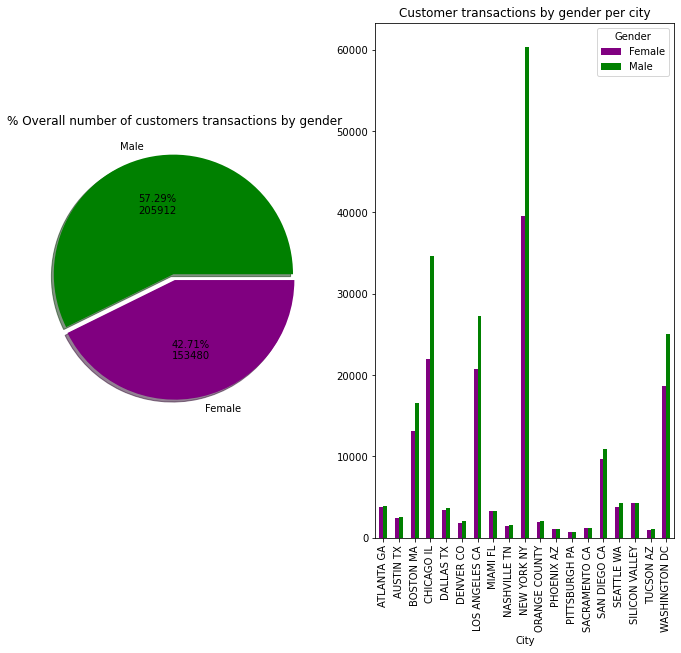

In [51]:
#Segment customer transactions per gender and by city 
gender_by_city = full_data.groupby(by=['City'])['Gender'].value_counts()
gender_by_city_1 = gender_by_city.unstack(level=1)
gender=full_data['Gender'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=2)
labels = ['Male', 'Female']
def abs_vals(pct, vals):
    absolute = int(np.round(pct/100.*np.sum(vals)))
    return f"{pct:.2f}%\n{absolute}"
# ax.pie(gender, labels = labels,autopct=lambda pct: abs_vals(pct, gender[labels]))
ax1.pie(gender, 
        labels = labels,
        autopct=lambda pct: abs_vals(pct, gender[labels]),
        shadow=True,
        explode=(0.05, 0),
        startangle=0,
       colors = ['green','purple'])#, ax=ax1)
          
ax1.set_title('% Overall number of customers transactions by gender')
ax2 = gender_by_city_1.plot(kind='bar',figsize = (10,8),color=['purple','green'],ax=ax2)
ax2.set_title('Customer transactions by gender per city')

Text(0.5, 1.0, '% of customer transactions by gender Yellow Cab')

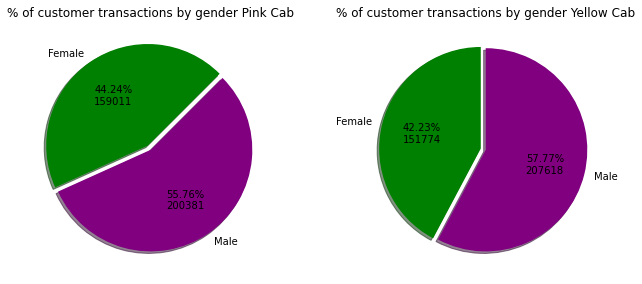

In [52]:
# Segement customer transactions by gender per Company
gender_by_company = full_data.groupby(by=['Company'])['Gender'].value_counts()
gender_by_company_1 = gender_by_company.unstack(level=0)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=5)
ax1.pie(gender_by_company_1['Pink Cab'], 
        labels = ['Female', 'Male'],
        autopct=lambda pct: abs_vals(pct, gender[labels]),
        shadow=True,
        explode=(0.05, 0),
        startangle=45,
       colors = ['green','purple'])#, ax=ax1)

ax2.pie(gender_by_company_1['Yellow Cab'], 
        labels = ['Female', 'Male'],
        autopct=lambda pct: abs_vals(pct, gender[labels]),
        shadow=True,
        explode=(0.05, 0),
        startangle=90,
       colors = ['green','purple'])#, ax=ax1)

ax1.set_title('% of customer transactions by gender Pink Cab')

ax2.set_title('% of customer transactions by gender Yellow Cab')

Text(0.5, 0.98, 'Customer Transactions segemented by Age Groups and Gender')

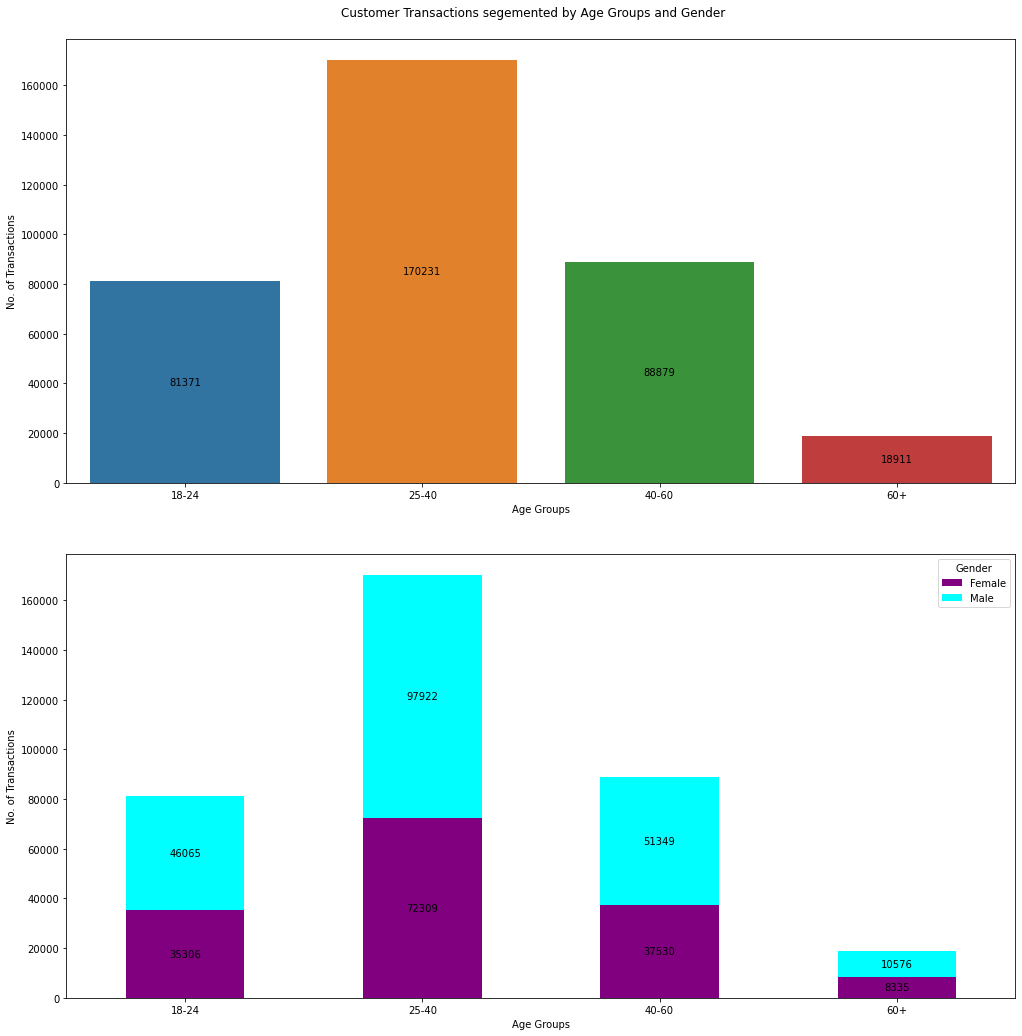

In [53]:
# Segment customer transactions by age-groups
full_data.loc[full_data['Age']>=18,'Age_group'] = '18-24'
full_data.loc[full_data['Age']>24,'Age_group'] = '25-40'
full_data.loc[full_data['Age']>39,'Age_group'] = '40-60'
full_data.loc[full_data['Age']>60,'Age_group'] = '60+'

age_groups = full_data.groupby(by='Age_group')['Age'].count()
age_groups_gender = full_data.groupby(by='Age_group')['Gender'].value_counts()
age_groups_gender_1 = age_groups_gender.unstack(level=1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
fig.tight_layout(pad=5)
ax1 = sns.barplot(x = age_groups.index, y = age_groups.values, ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container,label_type='center', rotation=0, color='black')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('No. of Transactions')
# ax1.bar_label(ax.containers[1])

ax2 = age_groups_gender_1.plot(kind='bar', stacked=True, color=['purple','cyan'],ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='center', rotation=0, color='black')#,fmt='%d')
plt.xticks(rotation=0)
ax2.set_xlabel('Age Groups')
ax2.set_ylabel('No. of Transactions')
plt.suptitle('Customer Transactions segemented by Age Groups and Gender')
# ax2.label(ax.containers[0])
# ax2.bar_label(ax.containers[1])

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

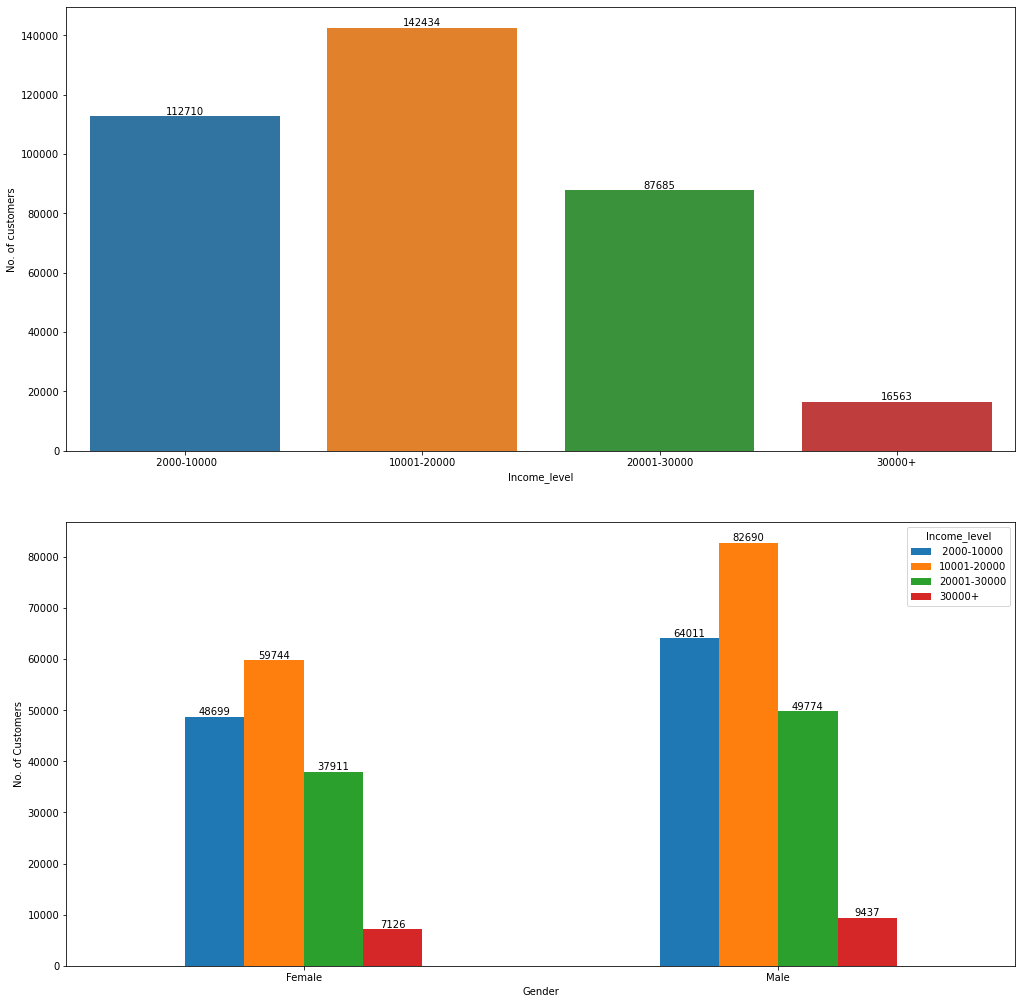

In [54]:
full_data.loc[full_data['Income (USD/Month)']>=2000,'Income_level'] = ' 2000-10000'
full_data.loc[full_data['Income (USD/Month)']>10000,'Income_level'] = '10001-20000'
full_data.loc[full_data['Income (USD/Month)']>20000,'Income_level'] = '20001-30000'
full_data.loc[full_data['Income (USD/Month)']>30000,'Income_level'] = '30000+'

income_groups_gender = full_data.groupby(by='Income_level')['Gender'].value_counts()
# income_groups_gender
income_groups_gender_1 = income_groups_gender.unstack(level=0)
# income_groups_gender_1

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
fig.tight_layout(pad=5)

# plt.figure(figsize = (10,8))
income_groups = full_data.groupby(by='Income_level')['Customer ID'].count().reset_index()
ax1 = sns.barplot(data=income_groups, x= 'Income_level', y = 'Customer ID', ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container,label_type='edge', rotation=0, color='black')
# ax1.bar_label(ax.containers[0])
ax1.set_ylabel('No. of customers')

ax2 = income_groups_gender_1.plot(kind='bar',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='edge', rotation=0, color='black')#,fmt='%d')
ax2.set_ylabel('No. of Customers')
ax2.set_xticklabels(['Female','Male'],rotation=0)

### Seasonality

Text(0.5, 1.0, 'Customer transactions per day of the month')

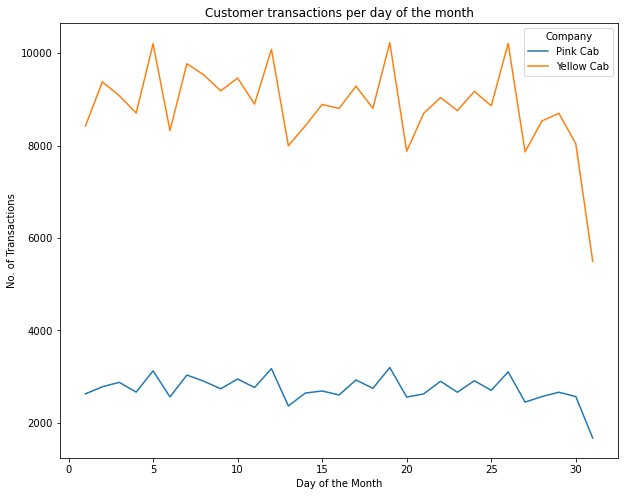

In [55]:
plt.figure(figsize = (10,8))
days = full_data.groupby(by=['day','Company'])['Customer ID'].count().reset_index()
ax = sns.lineplot(data=days, x='day',y='Customer ID', hue='Company')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('No. of Transactions')
plt.title('Customer transactions per day of the month')

Text(0.5, 1.0, 'Customer transactions per Quarter')

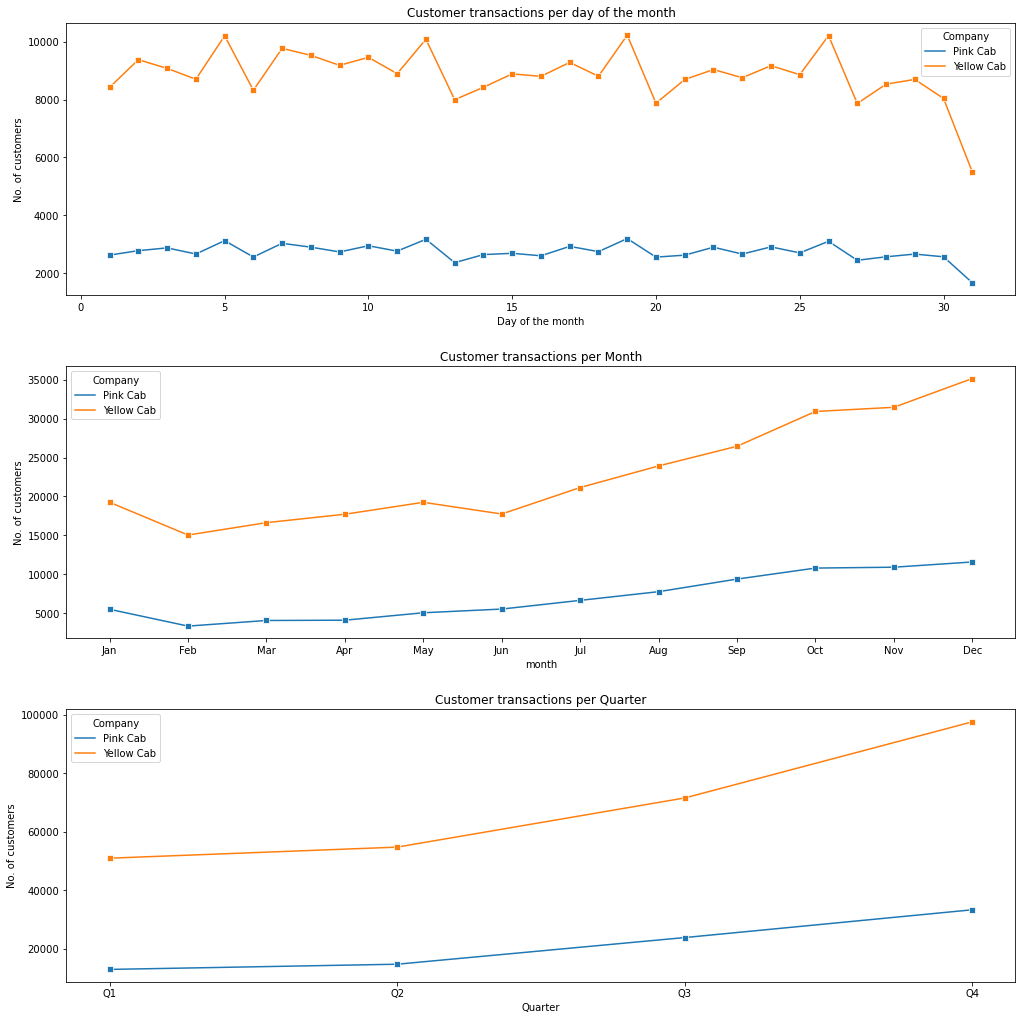

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))
fig.tight_layout(pad=5)
days = full_data.groupby(by=['day','Company'])['Customer ID'].count().reset_index()
ax1 = sns.lineplot(data=days, x='day',y='Customer ID', hue='Company', marker = 's', ax=ax1)
ax1.set_xlabel('Day of the month')
ax1.set_ylabel('No. of customers')
ax1.set_title('Customer transactions per day of the month')

months = full_data.groupby(by=['month','Company'])['Customer ID'].count().reset_index()

cal = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months['month'] = pd.Categorical(months['month'], categories=cal, ordered=True)
months = months.sort_values(by='month')
ax2 = sns.lineplot(data=months, x='month',y='Customer ID', hue='Company',marker = 's', ax=ax2)
ax2.set_ylabel('No. of customers')
ax2.set_title('Customer transactions per Month')

full_data.loc[full_data['month']=='Jan','Quarter'] = 'Q1'
full_data.loc[full_data['month']=='Feb','Quarter'] = 'Q1'
full_data.loc[full_data['month']=='Mar','Quarter'] = 'Q1'
full_data.loc[full_data['month']=='Apr','Quarter'] = 'Q2'
full_data.loc[full_data['month']=='May','Quarter'] = 'Q2'
full_data.loc[full_data['month']=='Jun','Quarter'] = 'Q2'
full_data.loc[full_data['month']=='Jul','Quarter'] = 'Q3'
full_data.loc[full_data['month']=='Aug','Quarter'] = 'Q3'
full_data.loc[full_data['month']=='Sep','Quarter'] = 'Q3'
full_data.loc[full_data['month']=='Oct','Quarter'] = 'Q4'
full_data.loc[full_data['month']=='Nov','Quarter'] = 'Q4'
full_data.loc[full_data['month']=='Dec','Quarter'] = 'Q4'

quarter_customers = full_data.groupby(by=['Quarter','Company'])['Customer ID'].count().reset_index()
ax3 = sns.lineplot(data=quarter_customers, x='Quarter',y='Customer ID', hue='Company', marker = 's')
ax3.set_ylabel('No. of customers')
ax3.set_title('Customer transactions per Quarter')



### Profit

Text(0.5, 1.0, 'Overall Profit')

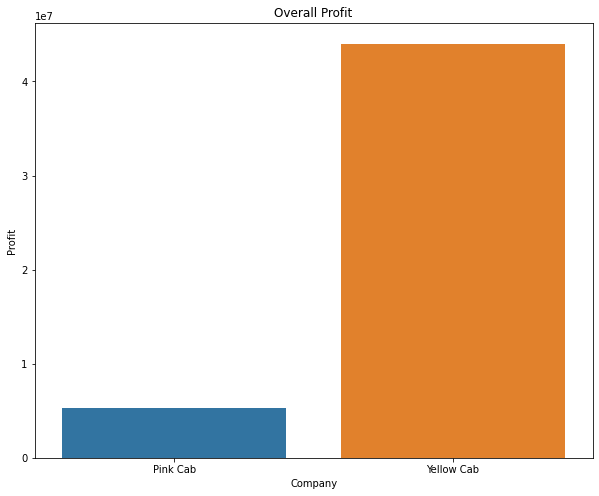

In [57]:
# Overall profit by company
profit = full_data.groupby('Company')['Profit'].sum().reset_index()
# profit
plt.figure(figsize = (10,8))
sns.barplot(data=profit, x='Company', y='Profit')
plt.title('Overall Profit')

Text(0.5, 1.0, 'Profits by Year')

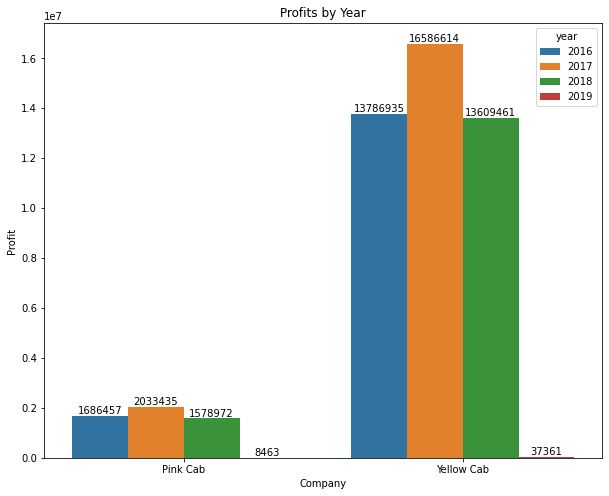

In [58]:
# Overall profit by company per year
profit_per_year = full_data.groupby(by=['Company','year'])['Profit'].sum().reset_index()
# profit_per_year
plt.figure(figsize = (10,8))
ax = sns.barplot(data=profit_per_year, x='Company', y='Profit', hue='year')#, aspect=2 )
ax.bar_label(ax.containers[0], fmt = '%d')
ax.bar_label(ax.containers[1], fmt = '%d')
ax.bar_label(ax.containers[2], fmt = '%d')
ax.bar_label(ax.containers[3], fmt = '%d')
plt.title('Profits by Year')

Text(0.5, 1.0, 'Profit by State')

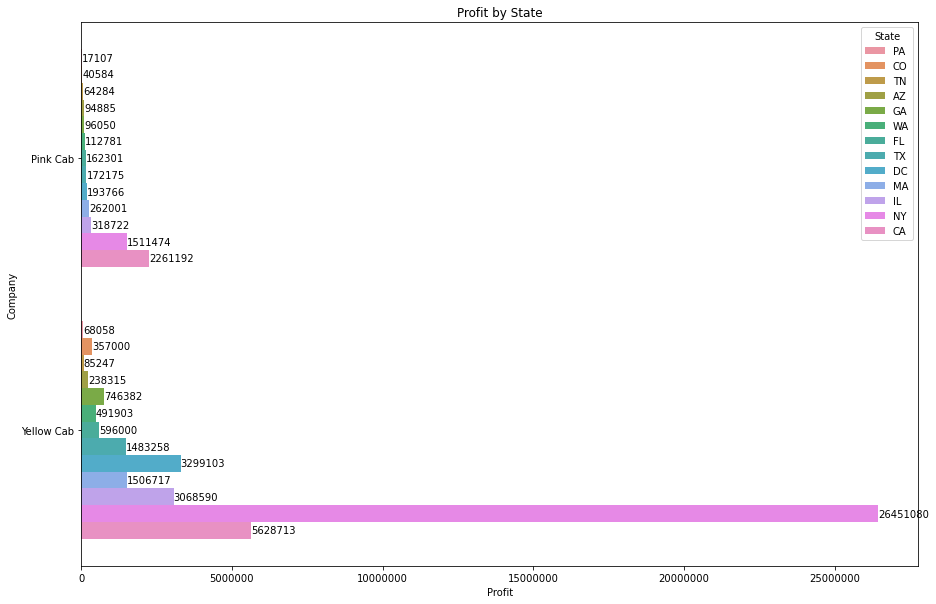

In [59]:
# Overall profit by company per state
profit_by_state = full_data.groupby(by=['Company','State'])['Profit'].sum().sort_values().reset_index()
# profit_by_state
plt.figure(figsize = (15,10))
ax = sns.barplot(data=profit_by_state, y='Company', x='Profit', hue='State')#, height=0.8)#, aspect=2 )
ax.ticklabel_format(axis='x', style='plain')
# ax.bar_label(ax.containers[8], label_type='edge', rotation=0, color='black',fmt='%d')
for container in ax.containers:
    ax.bar_label(container,label_type='edge', rotation=0, color='black',fmt='%d')
ax.set_xlabel('Profit')
plt.title('Profit by State')

Text(0.5, 1.0, 'KM travelled by Company per Year')

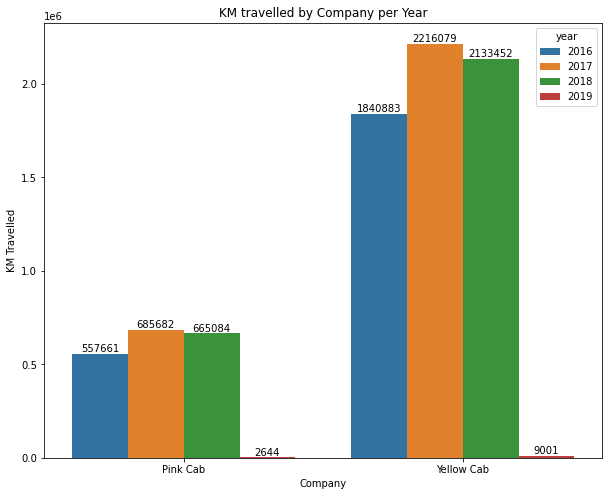

In [60]:
km_travelled_per_year = full_data.groupby(by=['Company', 'year'])['KM Travelled'].sum().reset_index()
km_travelled_per_year
plt.figure(figsize = (10,8))
ax = sns.barplot(data=km_travelled_per_year, x='Company', y='KM Travelled', hue='year')
ax.bar_label(ax.containers[0], fmt = '%d')
ax.bar_label(ax.containers[1], fmt = '%d')
ax.bar_label(ax.containers[2], fmt = '%d')
ax.bar_label(ax.containers[3], fmt = '%d')
ax.set_title('KM travelled by Company per Year')

Text(0.5, 1.0, 'KM travelled by Company per Distance Groups')

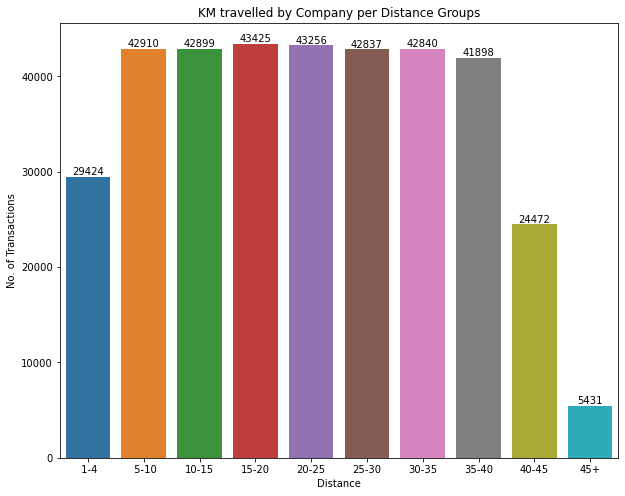

In [61]:
full_data.loc[full_data['KM Travelled'] >1,'Distance'] = ' 1-4'
full_data.loc[full_data['KM Travelled'] >=5,'Distance'] = ' 5-10'
full_data.loc[full_data['KM Travelled'] >=10,'Distance'] = '10-15'
full_data.loc[full_data['KM Travelled'] >=15,'Distance'] = '15-20'
full_data.loc[full_data['KM Travelled'] >=20,'Distance'] = '20-25'
full_data.loc[full_data['KM Travelled'] >=25,'Distance'] = '25-30'
full_data.loc[full_data['KM Travelled'] >=30,'Distance'] = '30-35'
full_data.loc[full_data['KM Travelled'] >=35,'Distance'] = '35-40'
full_data.loc[full_data['KM Travelled'] >=40,'Distance'] = '40-45'
full_data.loc[full_data['KM Travelled'] >=45,'Distance'] = '45+'
# full_data.loc[full_data['KM Travelled'] <50,'Distance'] = '20-25'
plt.figure(figsize = (10,8))
dist_groups = full_data.groupby(by='Distance')['Transaction ID'].count().reset_index()
ax = sns.barplot(data=dist_groups, x= 'Distance', y = 'Transaction ID')
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Transactions')
ax.set_title('KM travelled by Company per Distance Groups')

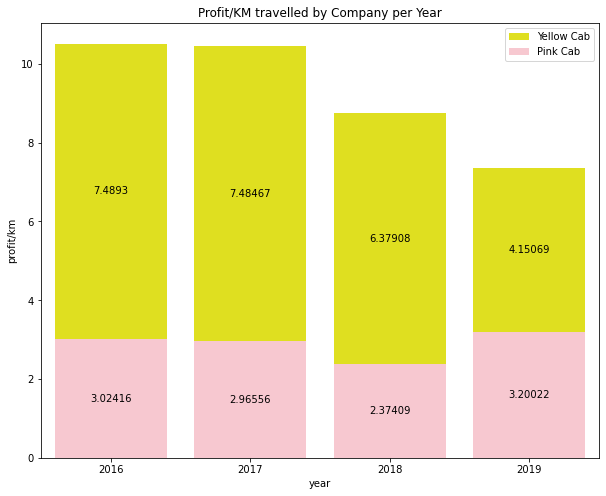

In [65]:
profit_km = full_data.groupby(by=['Company', 'year']).agg({'KM Travelled': 'sum', 'Profit': 'sum'}).reset_index()
profit_km['profit/km'] = profit_km['Profit'] / profit_km['KM Travelled']
profit_km_pink = profit_km[profit_km['Company'] == 'Pink Cab']
# profit_km_pink
profit_km_yellow = profit_km[profit_km['Company'] == 'Yellow Cab']
# profit_km_yellow
plt.subplots(figsize =(10, 8))

ax1 = sns.barplot(data=profit_km_yellow, x= 'year', y = 'profit/km',color = 'yellow', bottom=profit_km_pink['profit/km'], label= 'Yellow Cab')#, hue='year')
ax = sns.barplot(data=profit_km_pink, x= 'year', y = 'profit/km', color = 'pink', label= 'Pink Cab')#palette='Set2') #hue='year'

ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.set_title('Profit/KM travelled by Company per Year')
plt.legend()

In [66]:
# Data for 2019 is incomplete hence its exclusion from the dataset

Text(0.5, 0.98, 'Profits per Quarter by Company')

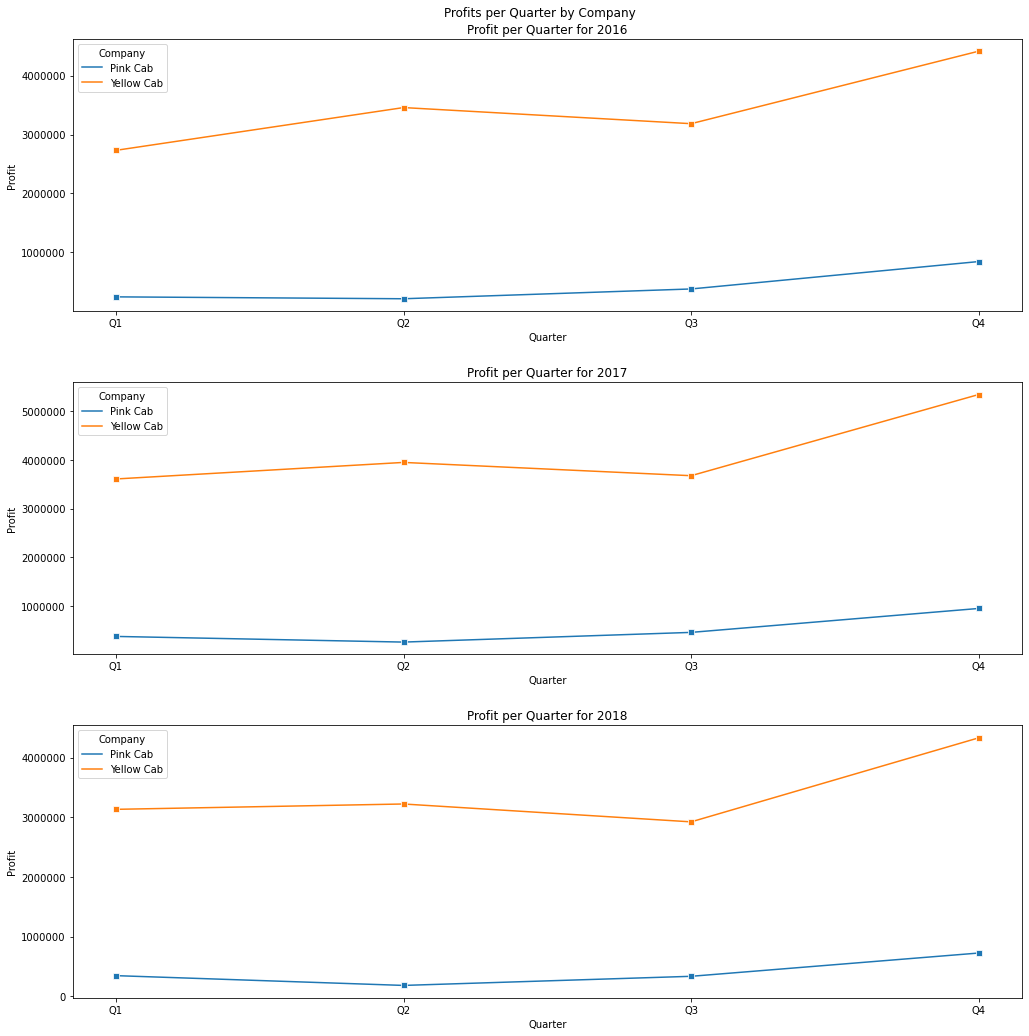

In [67]:
excl_2019 = full_data[full_data['year'] != 2019]
excl_2019

quarter_profits_ecl2019 = excl_2019.groupby(by=['Quarter','Company','year'])['Profit'].sum().reset_index()
quarter_profits_ecl2019

quarter_profits_2016 = quarter_profits_ecl2019[quarter_profits_ecl2019['year']==2016]
# quarter_profits_2016
quarter_profits_2017 = quarter_profits_ecl2019[quarter_profits_ecl2019['year']==2017]
# quarter_profits_2017
quarter_profits_2018 = quarter_profits_ecl2019[quarter_profits_ecl2019['year']==2018]
# quarter_profits_2018

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))
fig.tight_layout(pad=5)

ax1 = sns.lineplot(data=quarter_profits_2016, x='Quarter',y='Profit', hue='Company', marker = 's', ax=ax1)
ax1.ticklabel_format(axis='y', style='plain')
ax1.set_title('Profit per Quarter for 2016')

ax2 = sns.lineplot(data=quarter_profits_2017, x='Quarter',y='Profit', hue='Company', marker = 's', ax=ax2)
ax2.ticklabel_format(axis='y', style='plain')
ax2.set_title('Profit per Quarter for 2017')

ax3 = sns.lineplot(data=quarter_profits_2018, x='Quarter',y='Profit', hue='Company', marker = 's', ax=ax3)
ax3.ticklabel_format(axis='y', style='plain')
ax3.set_title('Profit per Quarter for 2018')
plt.suptitle('Profits per Quarter by Company')


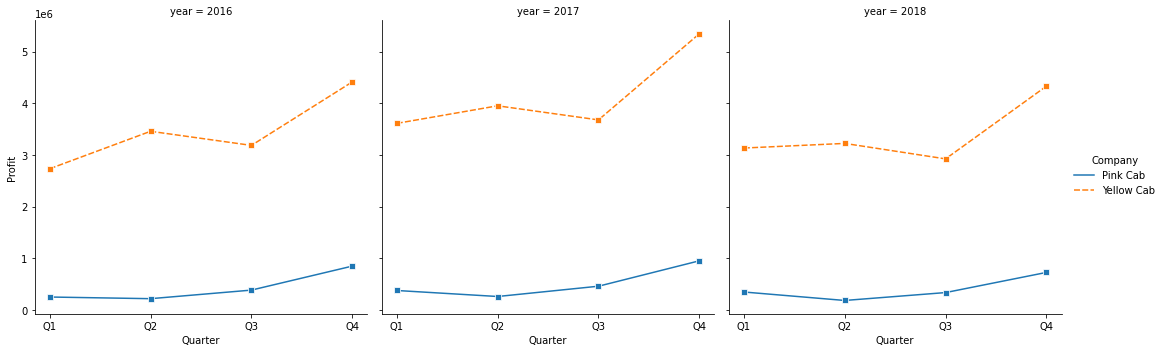

In [68]:
sns.relplot(
    data=quarter_profits_ecl2019,
    x="Quarter", 
    y="Profit",
    hue="Company", 
    style="Company", 
    col="year",
    marker = 's',
    kind="line"
#     height=4, aspect=.7, 
)

Text(0.5, 1.0, 'Profits by Year')

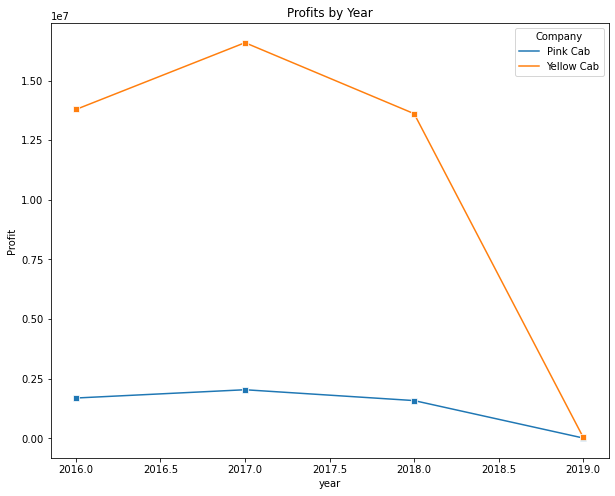

In [69]:
plt.figure(figsize = (10,8))
ax = sns.lineplot(data=profit_per_year, x='year', y='Profit', hue='Company', marker = 's')#, aspect=2 )
plt.title('Profits by Year')

Text(0.5, 1.0, 'Profits by Year')

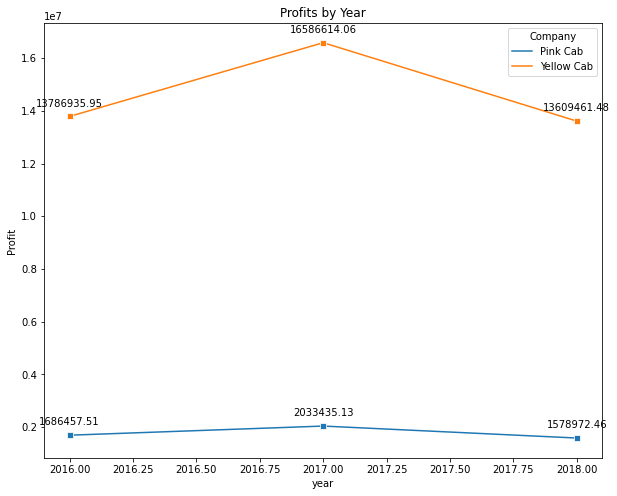

In [70]:
# Overall profit by company per year by state excluding 2019
profit_per_year_ex_2019 = excl_2019.groupby(by=['Company','year'])['Profit'].sum().reset_index()
# profit_per_year_ex_2019
plt.figure(figsize = (10,8))
ax = sns.lineplot(data=profit_per_year_ex_2019, 
                  x='year', 
                  y='Profit', 
                  hue='Company', marker = 's')
plt.title('Profits by Year')

for x,y in zip(profit_per_year_ex_2019['year'],profit_per_year_ex_2019['Profit']):
    label ="{:.2f}". format(y)
    ax.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title('Profits by Year')

### Predict profits for 2019

In [71]:
monthly = full_data.groupby(by=['month','year','Company'])['Profit'].sum().reset_index()
# monthly
monthly_pink = monthly[monthly['Company']=='Pink Cab']
# monthly_pink
monthly_yellow = monthly[monthly['Company']=='Yellow Cab']
# monthly_yellow
cal = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_pink['month'] = pd.Categorical(monthly_pink['month'], categories=cal, ordered=True)
monthly_pink = monthly_pink.sort_values(['year', 'month'])
monthly_yellow['month'] = pd.Categorical(monthly_yellow['month'], categories=cal, ordered=True)
monthly_yellow = monthly_yellow.sort_values(['year', 'month'])

C:\Users\MARK\AppData\Local\Temp\ipykernel_14452\2513611591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pink['month'] = pd.Categorical(monthly_pink['month'], categories=cal, ordered=True)
C:\Users\MARK\AppData\Local\Temp\ipykernel_14452\2513611591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_yellow['month'] = pd.Categorical(monthly_yellow['month'], categories=cal, ordered=True)


### Using ARIMA time series algorithm to predict monthly profits for Feb 2019 - Dec 2019

In [72]:
result_pink = adfuller(monthly_pink["Profit"], autolag='AIC')
result_pink

(-2.709115467764945,
 0.07247413414631991,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 663.5561260527019)

In [73]:
result_yellow = adfuller(monthly_pink["Profit"], autolag='AIC')
result_yellow

(-2.709115467764945,
 0.07247413414631991,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 663.5561260527019)

In [74]:
order = (1,0,1)

In [75]:
model_pink = ARIMA(monthly_pink["Profit"], order=order)
model_pink_fit = model_pink.fit()

model_pink_fit

C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [76]:
forecast_pink = model_pink_fit.forecast(steps=11)

forecast_pink

C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


37      5606.316569
38     79339.607825
39    113630.096763
40    129577.270849
41    136993.681907
42    140442.766533
43    142046.801783
44    142792.776254
45    143139.699997
46    143301.040750
47    143376.074066
Name: predicted_mean, dtype: float64

In [78]:
model_yellow = ARIMA(monthly_yellow["Profit"], order=order)
model_yellow_fit = model_yellow.fit()

model_yellow_fit

C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [79]:
forecast_yellow = model_yellow_fit.forecast(steps=11)

forecast_yellow

C:\Users\MARK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


37    3.909604e+05
38    1.345271e+06
39    1.159456e+06
40    1.195636e+06
41    1.188592e+06
42    1.189963e+06
43    1.189696e+06
44    1.189748e+06
45    1.189738e+06
46    1.189740e+06
47    1.189740e+06
Name: predicted_mean, dtype: float64

In [80]:
yellow_profit_2019 = {'Company':'Yellow Cab', 'year':2019, 'Profit':sum(forecast_yellow)}
yellow_profit_2019

{'Company': 'Yellow Cab', 'year': 2019, 'Profit': 12418541.50366077}

In [81]:
pink_profit_2019 = {'Company':'Pink Cab', 'year':2019, 'Profit':sum(forecast_pink)}
pink_profit_2019

{'Company': 'Pink Cab', 'year': 2019, 'Profit': 1320246.1332939907}

In [82]:
profit_per_year_2019 = profit_per_year_ex_2019._append(yellow_profit_2019,ignore_index=True)

In [83]:
profit_per_year_2019 = profit_per_year_2019._append(pink_profit_2019,ignore_index=True)

In [84]:
profit_per_year_2019

,Company,year,Profit
0,Pink Cab,2016,1.686458e+06
1,Pink Cab,2017,2.033435e+06
2,Pink Cab,2018,1.578972e+06
3,Yellow Cab,2016,1.378694e+07
4,Yellow Cab,2017,1.658661e+07
5,Yellow Cab,2018,1.360946e+07
6,Yellow Cab,2019,1.241854e+07
7,Pink Cab,2019,1.320246e+06


Text(0.5, 1.0, 'Profits by Year')

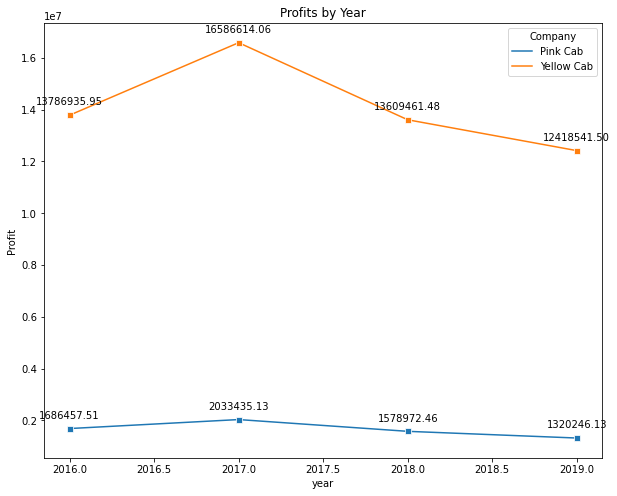

In [85]:
plt.figure(figsize = (10,8))
ax = sns.lineplot(data=profit_per_year_2019, 
                  x='year', 
                  y='Profit', 
                  hue='Company', marker = 's')
plt.title('Profits by Year')

for x,y in zip(profit_per_year_2019['year'],profit_per_year_2019['Profit']):
    label ="{:.2f}". format(y)
    ax.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title('Profits by Year')

## Hypothesis Testing

In [86]:
full_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,...,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State,Age_group,Income_level,Quarter,Distance
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,Jan,...,29290,Card,Male,28,10813,GA,25-40,10001-20000,Q1,30-35
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,Jan,...,27703,Card,Male,27,9237,GA,25-40,2000-10000,Q1,25-30
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,2016,Jan,...,28712,Cash,Male,53,11242,GA,40-60,10001-20000,Q1,5-10
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,2016,Jan,...,28020,Cash,Male,23,23327,GA,18-24,20001-30000,Q1,30-35
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,2016,Jan,...,27182,Card,Male,33,8536,GA,25-40,2000-10000,Q1,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,2018,Jan,...,52392,Cash,Male,24,15651,DC,18-24,10001-20000,Q1,1-4
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,2018,Jan,...,53286,Cash,Male,32,6528,DC,25-40,2000-10000,Q1,5-10
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,2018,Jan,...,52265,Cash,Male,56,7966,DC,40-60,2000-10000,Q1,25-30
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,2018,Jan,...,52175,Card,Male,32,6423,DC,25-40,2000-10000,Q1,5-10


In [87]:
full_data.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,year,day,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,0.941345,0.010333,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,-0.001007,0.000751,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.036221,-0.004112,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.486056,-0.001687,0.001000,0.003077,-0.000189,-0.000633
Profit,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.060332,-0.008023,-0.306527,-0.005093,0.006148
year,0.941345,-0.001007,-0.036221,-0.001687,-0.060332,1.000000,-0.031730,-0.003272,-0.000719,-0.001798
day,0.010333,0.000751,-0.004112,0.001000,-0.008023,-0.031730,1.000000,0.001838,0.000243,0.000656
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.306527,-0.003272,0.001838,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.000719,0.000243,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.001798,0.000656,-0.013608,0.003907,1.000000


<AxesSubplot:>

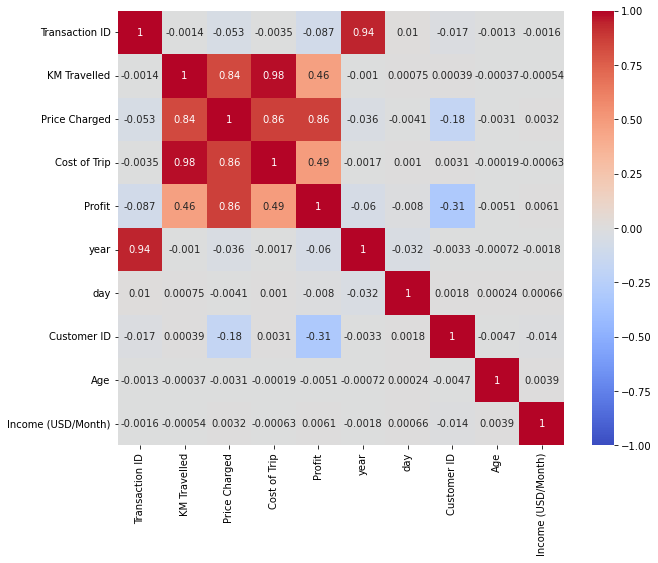

In [88]:
plt.figure(figsize = (10,8))
sns.heatmap(full_data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [89]:
import calendar

In [90]:
def cal_month(x):
    cal_num = list(calendar.month_abbr).index(x)
    return cal_num

In [91]:
cal_month('Jan')

1

In [92]:
full_data['Month_num'] = full_data['month'].apply(cal_month)

In [93]:
full_data['Month_num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [94]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [95]:
full_data_corr = full_data[['Company','City','KM Travelled','Price Charged','Cost of Trip','Profit','year','month','Payment_Mode','Gender','Age','Income (USD/Month)']]

In [96]:
full_data_corr

,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,Payment_Mode,Gender,Age,Income (USD/Month)
0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,Jan,Card,Male,28,10813
1,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,Jan,Card,Male,27,9237
2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,2016,Jan,Cash,Male,53,11242
3,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,2016,Jan,Cash,Male,23,23327
4,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,2016,Jan,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,2018,Jan,Cash,Male,24,15651
359388,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,2018,Jan,Cash,Male,32,6528
359389,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,2018,Jan,Cash,Male,56,7966
359390,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,2018,Jan,Card,Male,32,6423


In [97]:
encode = LabelEncoder()
scaler = StandardScaler()

In [98]:
full_data_corr['Company'] = encode.fit_transform(full_data_corr['Company'])
full_data_corr['City'] = encode.fit_transform(full_data_corr['City'])
full_data_corr['year'] = encode.fit_transform(full_data_corr['year'])
full_data_corr['month'] = encode.fit_transform(full_data_corr['month'])
full_data_corr['Payment_Mode'] = encode.fit_transform(full_data_corr['Payment_Mode'])
full_data_corr['Gender'] = encode.fit_transform(full_data_corr['Gender'])

C:\Users\MARK\AppData\Local\Temp\ipykernel_14452\703191992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_corr['Company'] = encode.fit_transform(full_data_corr['Company'])
C:\Users\MARK\AppData\Local\Temp\ipykernel_14452\703191992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_corr['City'] = encode.fit_transform(full_data_corr['City'])
C:\Users\MARK\AppData\Local\Temp\ipykernel_14452\703191992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [99]:
full_data_corr

,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,Payment_Mode,Gender,Age,Income (USD/Month)
0,0,0,30.45,370.95,313.6350,57.3150,0,4,0,1,28,10813
1,0,0,28.62,358.52,334.8540,23.6660,0,4,0,1,27,9237
2,0,0,9.04,125.20,97.6320,27.5680,0,4,1,1,53,11242
3,0,0,33.17,377.40,351.6020,25.7980,0,4,1,1,23,23327
4,0,0,8.73,114.62,97.7760,16.8440,0,4,0,1,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,1,18,4.80,69.24,63.3600,5.8800,2,4,1,1,24,15651
359388,1,18,8.40,113.75,106.8480,6.9020,2,4,1,1,32,6528
359389,1,18,27.75,437.07,349.6500,87.4200,2,4,1,1,56,7966
359390,1,18,8.80,146.19,114.0480,32.1420,2,4,0,1,32,6423


In [100]:
full_data_corr.corr()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,Payment_Mode,Gender,Age,Income (USD/Month)
Company,1.000000,0.002109,0.000333,0.227986,0.133713,0.258426,-0.003152,-0.027621,-0.001026,0.017279,0.000630,-0.000712
City,0.002109,1.000000,0.000471,0.037286,0.000776,0.063052,-0.001136,0.000013,-0.000885,-0.011733,-0.008872,-0.008725
KM Travelled,0.000333,0.000471,1.000000,0.835753,0.981848,0.462768,-0.001007,-0.001771,-0.000766,-0.001350,-0.000369,-0.000544
Price Charged,0.227986,0.037286,0.835753,1.000000,0.859812,0.864154,-0.036221,-0.009959,0.000226,0.012661,-0.003084,0.003228
Cost of Trip,0.133713,0.000776,0.981848,0.859812,1.000000,0.486056,-0.001687,-0.005804,-0.000898,0.000495,-0.000189,-0.000633
Profit,0.258426,0.063052,0.462768,0.864154,0.486056,1.000000,-0.060332,-0.011325,0.001273,0.021182,-0.005093,0.006148
year,-0.003152,-0.001136,-0.001007,-0.036221,-0.001687,-0.060332,1.000000,-0.018292,-0.001164,-0.012602,-0.000719,-0.001798
month,-0.027621,0.000013,-0.001771,-0.009959,-0.005804,-0.011325,-0.018292,1.000000,-0.000136,-0.006780,0.000801,0.002095
Payment_Mode,-0.001026,-0.000885,-0.000766,0.000226,-0.000898,0.001273,-0.001164,-0.000136,1.000000,-0.000080,-0.001118,-0.000866
Gender,0.017279,-0.011733,-0.001350,0.012661,0.000495,0.021182,-0.012602,-0.006780,-0.000080,1.000000,0.003366,-0.000991


<AxesSubplot:>

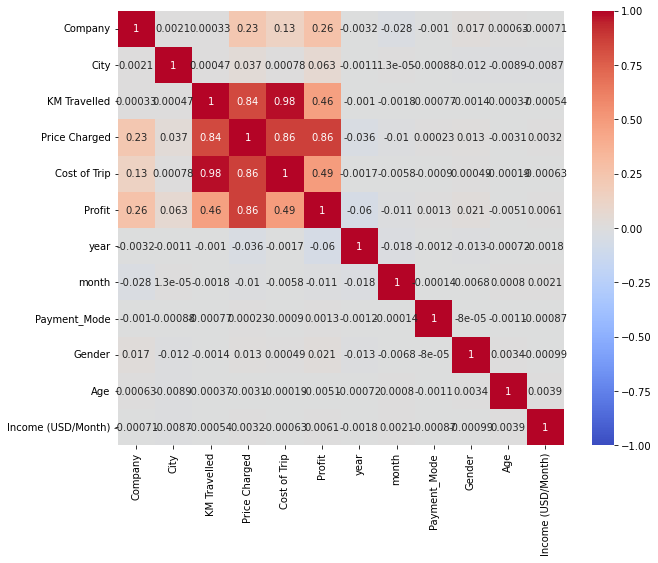

In [101]:
plt.figure(figsize = (10,8))
sns.heatmap(full_data_corr.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

#### Hypothesis 1

In [102]:
# H0 = There is no difference between average profits from male customers transactions and female customer transactions
# H1 = There is a difference between average profits from male customers transactions and female customer transactions                      

In [103]:
Males = full_data[(full_data.Gender=='Male')]
Females = full_data[(full_data.Gender=='Female')]  
male_profit = Males.Profit
female_profit = Females.Profit

C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

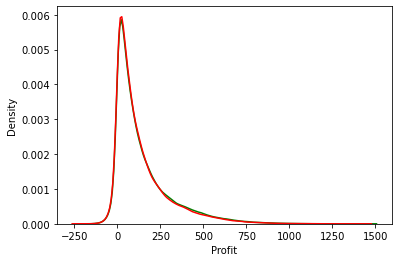

In [104]:
sns.distplot(male_profit,color='green',hist=False)
sns.distplot(female_profit,color='red',hist=False)

In [105]:
alpha = 0.05

In [106]:
t_statistic, p_value = stats.ttest_ind(male_profit, female_profit, equal_var=False)
print(f'tstats = {t_statistic}, p_value = {p_value}')

tstats = 12.779628685726511, p_value = 2.173838984882979e-37


In [108]:
if p_value <alpha :
    print(f"Conclusion:Since P value {p_value} is less than alpha {alpha}." )
    print("Reject Null Hypothesis: There is a difference between average profits from male customers transactions and female customer transactions ")
    
else:
    print(f"Conclusion:Since P value {p_value} is greater than alpha {alpha}." )
    print("Failed to Reject Null Hypothesis: There is no difference between average profits from male customers transactions and female customer transactions.")

Conclusion:Since P value 2.173838984882979e-37 is less than alpha 0.05.
Reject Null Hypothesis: There is a difference between average profits from male customers transactions and female customer transactions 


In [107]:
full_data.groupby('Gender').mean().Profit

Gender
Female    133.319979
Male      140.184890
Name: Profit, dtype: float64

#### Hypothesis 2

In [109]:
# H0 = There is no difference between average profits made from card payments and cash payments
# H1 = There is a difference between average profits made from card payments and cash payments
cards = full_data[(full_data.Payment_Mode=='Card')]
cash = full_data[(full_data.Payment_Mode=='Cash')]
cards_profit = cards.Profit
cash_profit = cash.Profit

C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

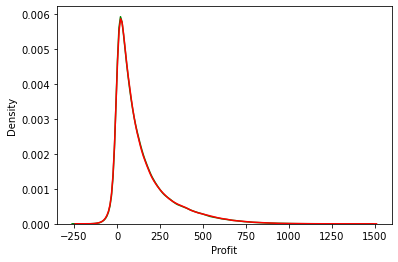

In [110]:
sns.distplot(cards_profit,color='green',hist=False)
sns.distplot(cash_profit,color='red',hist=False)

In [111]:
t_statistic, p_value = stats.ttest_ind(cash_profit, cards_profit, equal_var=False)
print(f'tstats = {t_statistic}, p_value = {p_value}')
if p_value <alpha :
    print(f"Conclusion:Since P value {p_value} is less than alpha {alpha}." )
    print("Reject Null Hypothesis: There is a difference between average profits made from card payments and cash payments.")
    
else:
    print(f"Conclusion:Since P value {p_value} is greater than alpha {alpha}." )
    print("Failed to Reject Null Hypothesis: There is no difference between average profits made from card payments and cash payments.")

tstats = 0.7620592170862006, p_value = 0.44602524758255335
Conclusion:Since P value 0.44602524758255335 is greater than alpha 0.05.
Failed to Reject Null Hypothesis: There is no difference between average profits made from card payments and cash payments.


#### Hypothesis 3

In [112]:
# H0 = There is no difference between average profits for each company
# H1 = There is a difference between average profits for each company
pink = full_data[(full_data.Company=='Pink Cab')]
yellow = full_data[(full_data.Company=='Yellow Cab')]
pink_profit = pink.Profit
yellow_profit = yellow.Profit

C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

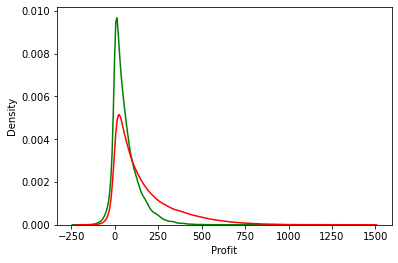

In [113]:
sns.distplot(pink_profit,color='green',hist=False)
sns.distplot(yellow_profit,color='red',hist=False)

In [114]:
t_statistic, p_value = stats.ttest_ind(pink_profit, yellow_profit, equal_var=False)
print(f'tstats = {t_statistic}, p_value = {p_value}')
if p_value <alpha :
    print(f"Conclusion:Since P value {p_value} is less than alpha {alpha}." )
    print("Reject Null Hypothesis: There is a difference between average profits for each company.")
    
else:
    print(f"Conclusion:Since P value {p_value} is greater than alpha {alpha}." )
    print("Failed to Reject Null Hypothesis: There is no difference between average profits for each company.")

tstats = -230.9955145274631, p_value = 0.0
Conclusion:Since P value 0.0 is less than alpha 0.05.
Reject Null Hypothesis: There is a difference between average profits for each company.


#### Hypothesis 4

In [115]:
# H0 = There is no difference between average profits for 2016, 2017 and 2018 for Pink company
# H1 = There is a difference between average profits for 2016, 2017 and 2018 for Pink company

In [116]:
pink_2016 = full_data[(full_data.Company=='Pink Cab')&(full_data.year==2016)]
pink_profit_2016 = pink_2016['Profit']
pink_2017 = full_data[(full_data.Company=='Pink Cab')&(full_data.year==2017)]
pink_profit_2017 = pink_2017['Profit']
pink_2018 = full_data[(full_data.Company=='Pink Cab')&(full_data.year==2018)]
pink_profit_2018 = pink_2018['Profit']

C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:xlabel='Profit', ylabel='Density'>

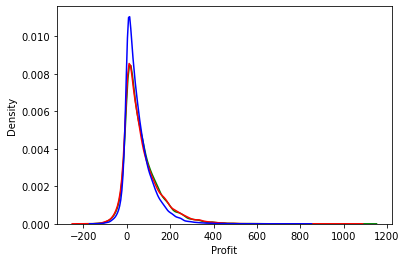

In [117]:
sns.distplot(pink_profit_2016,color='green',hist=False)
sns.distplot(pink_profit_2017,color='red',hist=False)
sns.distplot(pink_profit_2018,color='blue',hist=False)

In [118]:
pink = full_data[(full_data.Company=='Pink Cab')&(full_data.year<2019)]

In [119]:
pink.groupby('year').mean().Profit

year
2016    67.892815
2017    67.107856
2018    53.604443
Name: Profit, dtype: float64

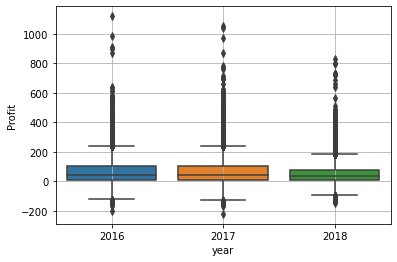

In [120]:
sns.boxplot(x="year", y="Profit", data=pink)
plt.grid()
plt.show()

In [121]:
formula = 'Profit ~ C(year)'
model = ols(formula, pink).fit()
aov_table = anova_lm(model)
aov_table
p_value = aov_table["PR(>F)"]['C(year)']

In [122]:
p_value = aov_table["PR(>F)"]['C(year)']

In [123]:
if p_value <alpha :
    print(f"Conclusion:Since P value {p_value} is less than alpha {alpha}." )
    print("Reject Null Hypothesis: There is a difference between average profits for 2016, 2017 and 2018 for Pink company.")
    
else:
    print(f"Conclusion:Since P value {p_value} is greater than alpha {alpha}." )
    print("Failed to Reject Null Hypothesis: There is no difference between average profits for 2016, 2017 and 2018 for Pink company.")

Conclusion:Since P value 1.9789961276390733e-134 is less than alpha 0.05.
Reject Null Hypothesis: There is a difference between average profits for 2016, 2017 and 2018 for Pink company.


#### Hypothesis 5

In [124]:
# H0 = There is no difference between average profits for 2016, 2017 and 2018 for Yellow company
# H1 = There is a difference between average profits for 2016, 2017 and 2018 for Yellow company
yellow_2016 = full_data[(full_data.Company=='Yellow Cab')&(full_data.year==2016)]
yellow_profit_2016 = yellow_2016['Profit']
yellow_2017 = full_data[(full_data.Company=='Yellow Cab')&(full_data.year==2017)]
yellow_profit_2017 = yellow_2017['Profit']
yellow_2018 = full_data[(full_data.Company=='Pink Cab')&(full_data.year==2018)]
yellow_profit_2018 = yellow_2018['Profit']

C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MARK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:xlabel='Profit', ylabel='Density'>

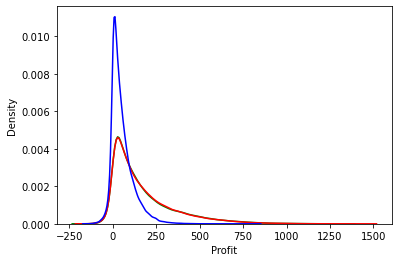

In [125]:
sns.distplot(yellow_profit_2016,color='green',hist=False)
sns.distplot(yellow_profit_2017,color='red',hist=False)
sns.distplot(yellow_profit_2018,color='blue',hist=False)

In [126]:
yellow = full_data[(full_data.Company=='Yellow Cab')&(full_data.year<2019)]
yellow.groupby('year').mean().Profit

year
2016    169.374758
2017    168.885819
2018    143.755337
Name: Profit, dtype: float64

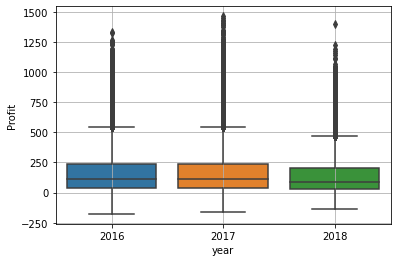

In [127]:
sns.boxplot(x="year", y="Profit", data=yellow)
plt.grid()
plt.show()

In [128]:
formula = 'Profit ~ C(year)'
model = ols(formula, yellow).fit()
aov_table = anova_lm(model)
aov_table
p_value = aov_table["PR(>F)"]['C(year)']

In [129]:
if p_value <alpha :
    print(f"Conclusion:Since P value {p_value} is less than alpha {alpha}." )
    print("Reject Null Hypothesis: There is a difference between average profits for 2016, 2017 and 2018 for Yellow company.")
    
else:
    print(f"Conclusion:Since P value {p_value} is greater than alpha {alpha}." )
    print("Failed to Reject Null Hypothesis: There is no difference between average profits for 2016, 2017 and 2018 for Yellow company.")

Conclusion:Since P value 2.048617084646908e-294 is less than alpha 0.05.
Reject Null Hypothesis: There is a difference between average profits for 2016, 2017 and 2018 for Yellow company.
